In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [2]:
def read_data(data):
    pts = np.genfromtxt(data, delimiter=',')
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

def plot_graph(X, y, intercept=False):
    #recode this
    lm = LinearRegression(fit_intercept=intercept)
    lm.fit(X, y)
    plt.scatter(X,y)
    x_values = X.min() - 1, X.max() + 1
    y = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
    plt.plot(x_values, y)
    plt.title(str(lm.coef_[0]))
    
def plot_dbl_graph(xy, xy_p):
    # maybe create a version of this that just takes in the X,y,X_p,y_p values, or a func that reads that also
    X = [a[0] for a in xy]
    y = [a[1] for a in xy]
    X_p = [a[0] for a in xy_p]
    y_p = [a[1] for a in xy_p]
    fig, (ax1,ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
    ax1.scatter(X,y)
    ax2.scatter(X_p, y_p)
    return fig, (ax1,ax2)

def single_pt_graph(X, y, X_p, y_p, lines=False, intercept=False):
    # right now only works for single dimension I think? Just need an extra case
    
    # create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))
    
    # scatter pts
    ax1.scatter(X, y)
    ax2.scatter(X_p, y_p)
    
    # model
    lm1 = LinearRegression(fit_intercept=intercept)
    lm1.fit(X,y)
    
    # fit first model
    x_values = 0, X_p.max() + 1
    y = [lm1.coef_[0] * x for x in x_values]
    ax1.plot(x_values, y)
    # set title
    ax1.set_title(str(lm1.coef_[0]))
    
    # 2nd model
    lm2 = LinearRegression(fit_intercept=intercept)
    lm2.fit(X_p, y_p)
    
    # fit second model
    x_values = 0, X_p.max() + 1
    #y = [lm2.intercept_ + lm2.coef_ * x for x in x_values]
    y = [lm2.coef_[0] * x for x in x_values]
    ax2.set_title(str(lm2.coef_[0]))
    ax2.plot(x_values, y)
    
    return fig, (ax1, ax2)

def extend_ds(X, y, X_p, y_p, pt):
    #fix these
    newx, newy = pt[0], pt[1]
    X = np.append(X, [[newx]], axis=0)
    y = np.append(y, [[newy]], axis=0)
    X_p = np.append(X_p, [[newx]], axis=0)
    y_p = np.append(y_p, [[newy]], axis=0)
    return X,y,X_p,y_p

def extend_ds_single(X, y, pt):
    # need to update for multidimensional
    newx, newy = pt[0], pt[1]
    X = np.append(X, [[newx]], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

def extend_ds_multidim(X, y, pt):
    # stopgap for now
    newx, newy = pt[:-1], pt[-1]
    X = np.append(X, [newx], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

def create_dataset(pts):
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

In [59]:
np.set_printoptions(precision=30)

In [111]:
initial = [[2,2,4], [6,2.5,1]]
pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm.fit(X0, y0)
print(lm.coef_)

[[-1.1428571428571435  3.142857142857144 ]]


In [175]:
#pts = np.array([[2,7], [3,4]])
#initial = [[3,4,5], [6,2,8]]
initial = [[2,2,4], [6,2.5,1], [2,9,2]]
pt1 = (6,3,9)
pt2 = (5,1,1)
pt3 = (1,5,5)
pt4 = (1,6,9)

pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm = LinearRegression(fit_intercept=False)
lm.fit(X0, y0)
print(lm.coef_)

X1, y1 = extend_ds_multidim(X0, y0, pt1)
lm.fit(X1, y1)
print(lm.coef_)

X2, y2 = extend_ds_multidim(X1, y1, pt2)
lm.fit(X2, y2)
print(lm.coef_)

X3, y3 = extend_ds_multidim(X2, y2, pt3)
lm.fit(X3, y3)
print(lm.coef_)

X4, y4 = extend_ds_multidim(X3, y3, pt4)
lm.fit(X4, y4)
print(lm.coef_)

[[0.22222222222222207 0.22222222222222232]]
[[0.8339339339339341 0.0960960960960961]]
[[0.6266666666666668  0.18666666666666662]]
[[0.552006552006552   0.36134316134316113]]
[[0.41756123297956504 0.6524077193124858 ]]


With ones and zeros

In [189]:
initial = [[0,1,1], [1,1,1], [0,1,0]]
pt1 = (-1,1,3)
pt2 = (2,2,1)
pt3 = (1,0,5)
pt4 = (0,2,4)

pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm = LinearRegression(fit_intercept=False)
lm.fit(X0, y0)
print(lm.coef_)

X1, y1 = extend_ds_multidim(X0, y0, pt1)
lm.fit(X1, y1)
print(lm.coef_)

X2, y2 = extend_ds_multidim(X1, y1, pt2)
lm.fit(X2, y2)
print(lm.coef_)

X3, y3 = extend_ds_multidim(X2, y2, pt3)
lm.fit(X3, y3)
print(lm.coef_)

X4, y4 = extend_ds_multidim(X3, y3, pt4)
lm.fit(X4, y4)
print(lm.coef_)

[[0.5                0.4999999999999996]]
[[-0.9999999999999998  1.2500000000000002]]
[[-0.8750000000000003  1.3124999999999996]]
[[0.3                0.7250000000000002]]
[[-2.1372535338839917e-16  1.2500000000000002e+00]]


In [32]:
import pandas as pd

In [37]:
a = pd.read_csv('test.csv')

In [5]:
%matplotlib notebook

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -0.000
Date:                Thu, 09 Jan 2020   Prob (F-statistic):                nan
Time:                        11:19:21   Log-Likelihood:                 68.556
No. Observations:                   2   AIC:                            -133.1
Df Residuals:                       0   BIC:                            -135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4545        inf          0        n

/anaconda3/envs/T02/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
/anaconda3/envs/T02/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/anaconda3/envs/T02/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/anaconda3/envs/T02/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/anaconda3/envs/T02/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid

<IPython.core.display.Javascript object>


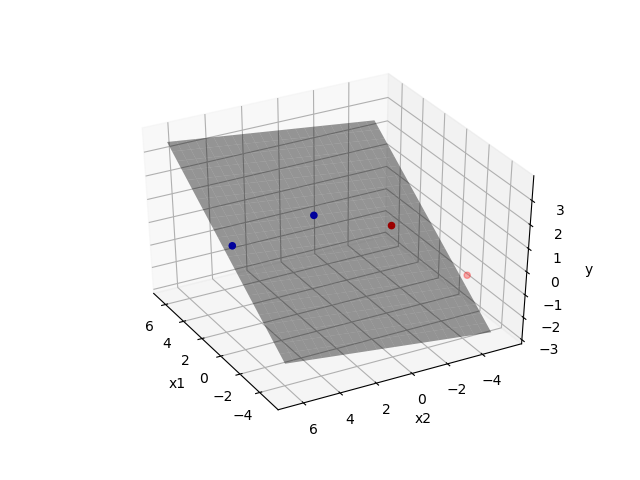

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('test.csv')
model = sm.ols(formula='y ~ x1 + x2 - 1', data = csv)
fit = model.fit()

print(fit.summary())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-5, 7, .5)                # generate a mesh
y_surf = np.arange(-5, 7, .5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'x1': x_surf.ravel(), 'x2': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                np.asarray(out).reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(init1[:,0], init1[:,1], init1[:,2], c='blue', marker='o', alpha=1)
ax.scatter(init2[:,0], init2[:,1], init2[:,2], c='red')

#ax.scatter(csv['x1'][:2], csv['x2'][:2], csv['y'][:2],
#           c='blue',
#           marker='o',
#           alpha=1)

#ax.scatter([2,1], [-1,-6], [1,-1], c='green', marker='X')
#ax.scatter([1,-2], [-14/5, -27/5], [1/5, -7/5], c='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [45]:
initial = [[2,7,2,3]]
pt1 = (5,2,8,1)
pt2 = (-1,8,2,0)
pt3 = (9,2,4,4)

pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm = LinearRegression(fit_intercept=False)
lm.fit(X0, y0)
print(lm.coef_)

X1, y1 = extend_ds_multidim(X0, y0, pt1)
lm.fit(X1, y1)
print(lm.coef_)

X2, y2 = extend_ds_multidim(X1, y1, pt2)
lm.fit(X2, y2)
print(lm.coef_)

X3, y3 = extend_ds_multidim(X2, y2, pt3)
lm.fit(X3, y3)
print(lm.coef_)

[[0.10526316 0.36842105 0.10526316]]
[[ 0.04404215  0.41799514 -0.00702513]]
[[ 1.09876543  0.2962963  -0.63580247]]
[[ 0.56446397  0.23236498 -0.30199885]]


array([[ 2,  7,  2],
       [ 5,  2,  8],
       [-1,  8,  2],
       [ 9,  2,  4]])

In [22]:
init1 = np.asarray([[1,6,1], [2,1,1]])
init2 = np.asarray([[1,-14/5,1/5], [-2,-27/5,-7/5]])

In [12]:
lm1 = LinearRegression(fit_intercept=False)
lm2 = LinearRegression(fit_intercept=False)

In [15]:
lm1.fit(init1[:,:-1], init1[:,-1])
lm2.fit(init2[:,:-1], init2[:,-1])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
print(lm1.coef_)
print(lm2.coef_)

[0.45454545 0.09090909]
[0.45454545 0.09090909]


<IPython.core.display.Javascript object>


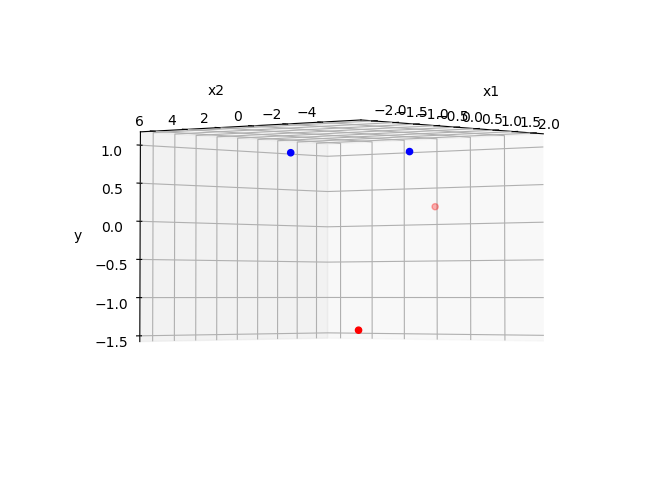

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(init1[:,0], init1[:,1], init1[:,2], c='blue', marker='o', alpha=1)
ax.scatter(init2[:,0], init2[:,1], init2[:,2], c='red')

x_surf = np.arange(-5, 7, .5)                # generate a mesh
y_surf = np.arange(-5, 7, .5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#ax.scatter([2,1], [-1,-6], [1,-1], c='green', marker='X')
#ax.scatter([1,-2], [-14/5, -27/5], [1/5, -7/5], c='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [23]:
# big question is... what happens when n = 3? does number of possible pts go up or down? 
# To answer this we first need to determine how many possible solutions there are to the 2x2 case
# in the 1x1 case, I believe we have two solutions
# Thus far in the 2x2 case I have found 3 solutions that are unique up to negation and permutation?
# Most importantly perhaps, can we get from one solution to the others?

In [216]:
lm = LinearRegression(fit_intercept=False)

In [223]:
initial = [[2,3], [1,2]]

pt1 = (5,10)
pt2 = (3,9)
pt3 = (9,2)

pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm = LinearRegression(fit_intercept=False)
lm.fit(X0, y0)
print(lm.coef_)

X1, y1 = extend_ds_multidim(X0, y0, pt1)
lm.fit(X1, y1)
print(lm.coef_)

X2, y2 = extend_ds_multidim(X1, y1, pt2)
lm.fit(X2, y2)
print(lm.coef_)

X3, y3 = extend_ds_multidim(X2, y2, pt3)
lm.fit(X3, y3)
print(lm.coef_)

[[1.5999999999999999]]
[[1.9333333333333331]]
[[2.1794871794871793]]
[[0.8583333333333332]]


In [228]:
initial = [[2,3]]
pt1 = (1,5)

pts = np.array(initial)
X0, y0 = create_dataset(pts)
lm = LinearRegression(fit_intercept=False)
lm.fit(X0, y0)
print(lm.coef_)

X1, y1 = extend_ds_multidim(X0, y0, pt1)
lm.fit(X1, y1)
print(lm.coef_)

[[1.5]]
[[2.2]]
